In [1]:
import sys
sys.path.append(r"C:\Users\User\Documents\GitHub\prodpy")

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from IPRcurve import IPR

In [5]:
poro = 0.19
perm = 8.2      # mD
height = 53     # ft
Pres = 5651     # psi
Bo = 1.1
muo = 1.7       # cp
ct = 1.29e-5    # 1/psi
darea = 640     # acres
rw = 0.328      # ft
skin = 0

In [6]:
Pb = 3000       # psi

In [7]:
re = np.sqrt((43560*darea)/np.pi)

In [8]:
inflow = IPR(
    poro = poro,
    perm = perm,
    height = height,
    pb = Pb,
    Bo = Bo,
    muo = muo,
    ct = ct,
    re = re,
    rw = rw,
    skin = skin
    )

In [19]:
prange = np.linspace(0,5651)
prange2 = np.array((5651,5000,4500,4000,3500,3000,2500,2000,1500,1000,500,0))
prange3 = np.array((0,565,1130,1695,2260,2826,3000,5651))

# Undersaturated Reservoirs

In [17]:
inflow.undersaturated(Pres,pwf=np.array([50,5651]),regime="steady")

array([1011.50305412,    0.        ])

In [18]:
inflow.undersaturated(Pres,pwf=np.array([50,5651]),regime="pseudo")

array([1102.2039174,    0.       ])

In [15]:
q_transt = inflow.undersaturated(Pres,pwf=prange,regime="transient",time=30)
q_steady = inflow.undersaturated(Pres,pwf=prange,regime="steady")
q_pseudo = inflow.undersaturated(Pres,pwf=prange,regime="pseudo")

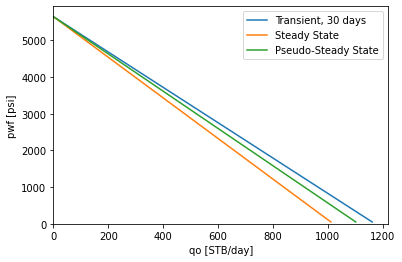

In [16]:
plt.plot(q_transt,prange,label='Transient, 30 days')
plt.plot(q_steady,prange,label='Steady State')
plt.plot(q_pseudo,prange,label='Pseudo-Steady State')

plt.xlabel("qo [STB/day]")
plt.ylabel("pwf [psi]")

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# Two-Phase Reservoirs

In [20]:
q_transt_vogel = inflow.saturated(Pres,pwf=prange,model="vogel",regime="transient",time=30)
q_steady_vogel = inflow.saturated(Pres,pwf=prange,model="vogel",regime="steady")
q_pseudo_vogel = inflow.saturated(Pres,pwf=prange,model="vogel",regime="pseudo")

TypeError: pi_transient() got an unexpected keyword argument 'model'

In [ ]:
q_transt_fetkovich = inflow.saturated(Pres,pwf=prange,model="fetkovich",n=2,regime="transient",time=30)
q_steady_fetkovich = inflow.saturated(Pres,pwf=prange,model="fetkovich",n=2,regime="steady")
q_pseudo_fetkovich = inflow.saturated(Pres,pwf=prange,model="fetkovich",n=2,regime="pseudo")

In [ ]:
plt.plot(q_transt,prange,label='Transient, 30 days')
plt.plot(q_steady,prange,label='Steady State')
plt.plot(q_pseudo,prange,label='Pseudo-Steady State')

plt.legend()

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

# Partial Two-Phase Reservoirs

In [ ]:
q_transt_vogel = inflow.partial(Pres,pwf=prange,model="vogel",regime="transient",time=30)
q_steady_vogel = inflow.partial(Pres,pwf=prange,model="vogel",regime="steady")
q_pseudo_vogel = inflow.partial(Pres,pwf=prange,model="vogel",regime="pseudo")

In [ ]:
q_transt_fetkovich = inflow.partial(Pres,pwf=prange,model="fetkovich",n=2,regime="transient",time=30)
q_steady_fetkovich = inflow.partial(Pres,pwf=prange,model="fetkovich",n=2,regime="steady")
q_pseudo_fetkovich = inflow.partial(Pres,pwf=prange,model="fetkovich",n=2,regime="pseudo")